**1. Problem Identification:**

Example: A telecom company wants to improve customer satisfaction and reduce service complaints.


*  **High Customer Churn**: The company is experiencing a significant loss of customers to competitors, indicating a decline in customer loyalty.
* उच्च ग्राहक गुमावट: कम्पनी प्रतिस्पर्धीहरूतर्फ ग्राहकहरूको ठूलो गुमावट अनुभव गरिरहेको छ, जसले ग्राहक वफादारीमा गिरावट देखाउँछ।


*  **Low Customer Satisfaction**: Surveys and feedback channels reveal consistently low customer satisfaction ratings.
* कम ग्राहक सन्तुष्टि: सर्वेक्षणहरू र प्रतिक्रिया च्यानलहरूले निरन्तर रूपमा कम ग्राहक सन्तुष्टि रेटिङ देखाउँछन्।

*  **Increased Service Complaints**: There's been a noticeable surge in customer complaints regarding service quality, billing issues, and network outages.
* बढ्दो सेवा गुनासो: सेवा गुणस्तर, बिलिङ समस्या, र नेटवर्क अवरोधहरू सम्बन्धी ग्राहक गुनासोहरू उल्लेखनीय रूपमा बढेका छन्।


*  **Negative Brand Perception**: The company's brand image is suffering due to negative online reviews and social media discussions related to poor customer service experiences.
* नकारात्मक ब्रान्ड छवि: कमजोर ग्राहक सेवा अनुभवहरूसँग सम्बन्धित नकारात्मक अनलाइन समीक्षाहरू र सामाजिक सञ्जाल छलफलहरूले कम्पनीको ब्रान्ड छविलाई असर पुर्याइरहेको छ।

*  **Decreased Revenue**: The combination of customer churn, low satisfaction, and complaints has led to a decline in overall revenue and profitability.
* घट्दो राजस्व: ग्राहक गुमावट, कम सन्तुष्टि, र गुनासोहरूको संयोजनले समग्र राजस्व र नाफामा गिरावट ल्याएको छ।

**2. Data Collection:**

Assume under using dummy data, we'll simulate data collection by generating a dataset. Let's assume the following attributes for customer data:

* **call_duration**: Duration of customer service calls (in minutes)
* **resolution_time**: Time taken to resolve the issue (in hours)
* **complaint_type**: Categorical variable indicating the type of complaint (e.g., 'Network', 'Billing', 'Technical')
* **satisfaction_score**: Customer satisfaction rating (1-5 scale)

In [ ]:
import numpy as np
import pandas as pd

# Generate dummy data
n_samples = 1000        #no of people


call_duration = np.random.exponential(scale=10, size=n_samples)
resolution_time = np.random.gamma(shape=2, scale=3, size=n_samples)
complaint_type = np.random.choice(['Network', 'Billing', 'Technical'], size=n_samples)
satisfaction_score = np.random.randint(1, 6, size=n_samples)

#print(call_duration)


# Create a Pandas DataFrame
data = pd.DataFrame({'call_duration': call_duration,
                   'resolution_time': resolution_time,
                   'complaint_type': complaint_type,
                   'satisfaction_score': satisfaction_score})

print(data)

     call_duration  resolution_time complaint_type  satisfaction_score
0        18.915608        13.209037        Billing                   5
1         9.392158        16.714845        Billing                   1
2         9.853107         4.879611        Network                   2
3        42.403134         3.139979      Technical                   3
4        11.228089         4.750026        Network                   1
..             ...              ...            ...                 ...
995       1.453862         3.811594        Network                   1
996       3.837786         0.813680      Technical                   1
997       9.850777        13.075101        Billing                   5
998       3.219582         1.694234        Billing                   5
999      37.532628         3.485759        Billing                   5

[1000 rows x 4 columns]


**3. Data Cleaning:**

For dummy data, we might introduce some missing values and inconsistencies to make it more realistic. Then, we'll clean the data.

In [ ]:
# Introduce missing values
data.loc[np.random.choice(data.index, size=50), 'call_duration'] = np.nan

# Introduce inconsistencies (e.g., negative resolution time)
data.loc[np.random.choice(data.index, size=30), 'resolution_time'] = -1 * data.loc[np.random.choice(data.index, size=30), 'resolution_time']

# Clean the data:
# 1. Replace negative resolution times with absolute values
data['resolution_time'] = data['resolution_time'].abs()
# 2. Impute missing call durations with the mean
data['call_duration'].fillna(data['call_duration'].mean(), inplace=True)




<ipython-input-4-8810a8ee408c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['call_duration'].fillna(data['call_duration'].mean(), inplace=True)


**4. Data Analysis:**

We can analyze the data using descriptive statistics, visualizations, and correlations.

                call_duration  resolution_time  satisfaction_score
complaint_type                                                    
Billing             10.121943         6.111310            2.908555
Network              9.866531         5.832400            2.950920
Technical            9.385617         5.979243            3.017910

                    call_duration  resolution_time  satisfaction_score
call_duration            1.000000         0.035161           -0.032195
resolution_time          0.035161         1.000000            0.049423
satisfaction_score      -0.032195         0.049423            1.000000


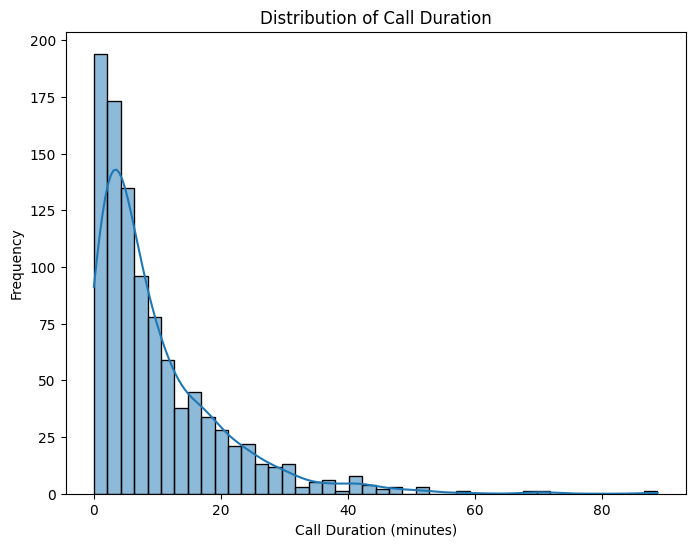

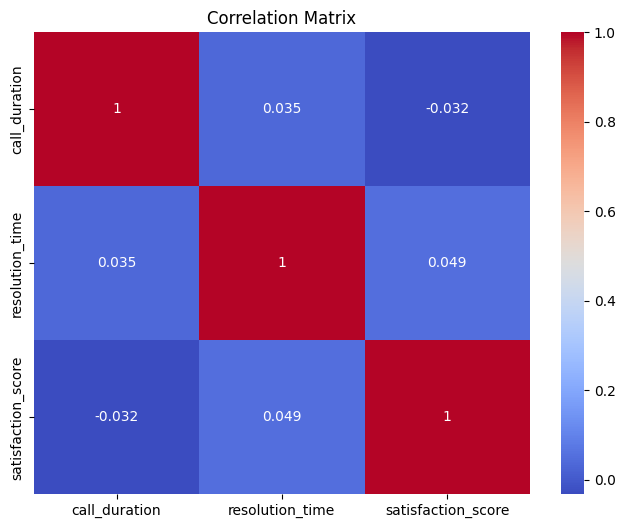

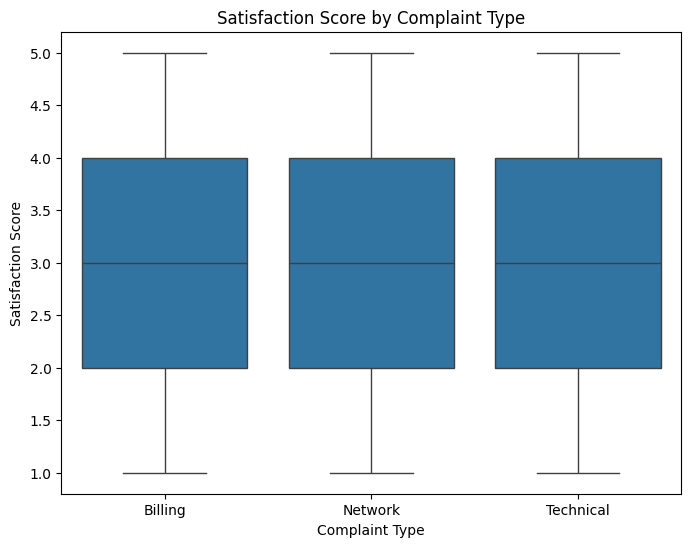

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



# Calculate average call duration, resolution time, and satisfaction score for each complaint type
avg_stats = data.groupby('complaint_type')[['call_duration', 'resolution_time', 'satisfaction_score']].mean()

# Calculate correlation between call duration, resolution time, and satisfaction score
correlation = data[['call_duration', 'resolution_time', 'satisfaction_score']].corr()


print(avg_stats)
print("================================================================")
print()
print(correlation)



print("================================================================")
print("================================================================")
print("================================================================")
print("================================================================")

# Visualizations
# 1. Distribution of call duration
plt.figure(figsize=(8, 6))
sns.histplot(data['call_duration'], kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Box plot of satisfaction score by complaint type
plt.figure(figsize=(8, 6))
sns.boxplot(x='complaint_type', y='satisfaction_score', data=data)
plt.title('Satisfaction Score by Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Satisfaction Score')
plt.show()



**5. Interpretation:**

Visualizations like the correlation matrix and box plots help in understanding relationships and patterns in the data. For example, a strong negative correlation between call duration and satisfaction score suggests that reducing call times could improve satisfaction.

**6. Decision Making:**

Using the insights, the telecom company might decide to implement strategies to reduce call wait times, improve technical support processes, or provide better training to customer service representatives.

Visualizations such as bar charts comparing average satisfaction scores for different complaint types can aid decision-making. If 'Technical' complaints show consistently lower satisfaction, the company might decide to invest in improving technical support processes.

**7. Implementation:**

This step involves executing the decisions made, such as introducing new technologies, redesigning workflows, or implementing training programs.


Visualizations can also be used to track progress after implementing changes. Line charts displaying customer satisfaction scores over time can show if the implemented solutions are having the desired effect. You might also use bar charts to show the decrease in the number of customer complaints over time per complaint type.

**8. Feedback Loop:**

After implementation, the company should continuously monitor customer satisfaction scores and complaint rates to assess the effectiveness of the changes. They can then refine the process based on the feedback received.



---


Here are some feedback channels to consider for the telecom company example:

---

**Customer Satisfaction Surveys:** Regularly conducted surveys to measure overall satisfaction with services. You can use libraries like pandas and matplotlib to analyze survey responses.

**Customer Service Logs:** Analyze call logs and support tickets for common issues and recurring complaints.

**Social Media Monitoring:** Track mentions of the company on social media platforms to understand customer sentiment and identify potential issues.

**Online Reviews:** Monitor online review platforms for feedback on service quality and customer experience.

**Complaint Tracking System:** Maintain a system to record and categorize customer complaints to identify patterns and trends.

**Employee Feedback:** Gather feedback from customer-facing employees for insights on areas for improvement.


In [ ]:
import pandas as pd

# Load survey data into a DataFrame
survey_data = pd.read_csv('survey_responses.csv')  # Replace with your actual file path

# Analyze satisfaction scores
avg_satisfaction = survey_data['satisfaction_score'].mean()
print(f"Average Satisfaction Score: {avg_satisfaction}")

# Analyze feedback comments
feedback_comments = survey_data['feedback_comments'].tolist()
# ... (further analysis of text data using NLP techniques) ...

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to analyze the overall mood and sentiment of the texts.
def determine_sentiment(text):
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(text)
  overall_sentiment = 'positive' if scores['compound'] >= 0.05 else 'negative' if scores['compound'] <= -0.05 else 'neutral'
  return overall_sentiment, scores

feedback = input("Enter your feedback: ")
sentiment_result, sentiment_scores = determine_sentiment(feedback)
print("Overall sentiment:", sentiment_result)
print("Sentiment scores:", sentiment_scores)